# Lab 7 - 089826

In [909]:
from operator import concat

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fontTools.subset import subset
from parso.python.tree import Operator
from wordcloud import WordCloud

In [848]:
sns.set_theme(style="darkgrid")

In [849]:
crash_data = pd.read_csv('./data/lab7/Airplane_Crashes_and_Fatalities_Since_1908.csv')

In [850]:
crash_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


## Data Cleaning

In [851]:
crash_data_cleaned = crash_data.copy()

In [852]:
crash_data_cleaned['Time'] = crash_data_cleaned['Time'].fillna('00:00')

In [853]:
crash_data_cleaned['Time'].unique()

array(['17:18', '06:30', '00:00', ..., '01:25', '03:57', '15:32'],
      dtype=object)

In [854]:
crash_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          5268 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [855]:
crash_data_cleaned['Location'].unique()

array(['Fort Myer, Virginia', 'AtlantiCity, New Jersey',
       'Victoria, British Columbia, Canada', ...,
       'AtlantiOcean, 570 miles northeast of Natal, Brazil',
       'Near Port Hope Simpson, Newfoundland, Canada',
       'State of Arunachal Pradesh, India'], dtype=object)

In [856]:
crash_data_cleaned = crash_data_cleaned.dropna(subset=['Location'])

In [857]:
crash_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5248 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5248 non-null   object 
 1   Time          5248 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5231 non-null   object 
 4   Flight #      1067 non-null   object 
 5   Route         3553 non-null   object 
 6   Type          5221 non-null   object 
 7   Registration  4917 non-null   object 
 8   cn/In         4028 non-null   object 
 9   Aboard        5227 non-null   float64
 10  Fatalities    5237 non-null   float64
 11  Ground        5227 non-null   float64
 12  Summary       4865 non-null   object 
dtypes: float64(3), object(10)
memory usage: 574.0+ KB


In [858]:
operator_list = crash_data_cleaned['Operator'].unique()

for operator in operator_list:
    print(operator)

Military - U.S. Army
Military - U.S. Navy
Private
Military - German Navy
Military - German Army
US Aerial Mail Service
Aircraft Transport and Travel
By Air
Latecoere Airlines
Handley Page Transport
Aeropostale
Military - Royal Australian Air Force
Military - Royal Airship Works
Franco-Roumaine
West Australian Airways
Military - U.S. Army Air Service
Daimler Airways / Grands Express Aeriens
nan
Vickers
Cie des Messageries Aeriennes
Grands Express Aeriens
Amee de l'Air
Campagnie France Roumaine
Daimler Airways
CCCP
Military - French Navy
KLM Royal Dutch Airlines
SCADTA
Imperial Airways
Zakavia
Lignes Aeriennes Latecoere
CIDNA
Air Union
Deutche Lufthansa
Compagnie Internationale de Navigation Aérienne
Deutsche Lufthansa
PacifiAir Transport
Qantas
Varney Air Lines
Colonial Air Transport
Reynolds Airways
Aero O-Y
National Air Transport
Colonial Western Airlines
Boeing Air Transport
Iberia Airlines
Ford Air Freight Inc.
British Columbia Airways
National Parks Airways
Universal Airlines
Conti

In [859]:
crash_data_cleaned[crash_data_cleaned['Operator'].isna()]

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
61,04/08/1922,00:00,"Pao Ting Fou, China",NaN,NaN,NaN,NaN,NaN,NaN,17.0,17.0,0.0,All seventeen aboard were Chinese nationals.
67,10/02/1922,00:00,"Venice, Italy",NaN,NaN,NaN,de Havilland DH-9,G-EAYT,NaN,4.0,4.0,0.0,NaN
106,09/26/1926,00:00,"New York, New York",NaN,NaN,New York - Paris,Sikorsky S-25,NaN,NaN,5.0,2.0,0.0,Too much weight caused the landing gear to col...
138,03/03/1928,00:00,"Rio de Janeiro, Brazil",NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,0.0,NaN
164,12/04/1928,00:00,"Rio de Janeiro, Brazil",NaN,NaN,NaN,Junkers G24,NaN,NaN,6.0,6.0,0.0,The aircraft's wingtip struck the water and cr...
359,05/29/1935,00:00,"San Barbra, Honduras",NaN,NaN,NaN,NaN,NaN,NaN,9.0,6.0,0.0,Crashed into the Ulua River.
482,08/10/1938,00:00,"Debrecen, Hungary",NaN,NaN,NaN,Ford Tri-motor,NaN,NaN,12.0,12.0,0.0,The plane was carrying Hungarian journalists.
545,11/09/1940,00:00,"Rio de Janeiro, Brazil",NaN,NaN,Rio de Janeiro - Sao Paulo,NaN,NaN,NaN,18.0,18.0,0.0,Midair collisioin with a private plane.
618,07/04/1943,23:00,Gibraltar,NaN,NaN,NaN,Consolidated Liberator B24 C,A-L-523,NaN,13.0,12.0,0.0,"The flight, bound for London, crashed into the..."
772,04/08/1946,00:00,"Near Shensi, China",NaN,NaN,Shensi - Yenan,NaN,NaN,NaN,14.0,14.0,0.0,NaN


In [860]:
crash_data_cleaned

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,00:00,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,00:00,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,NaN,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [861]:
crash_data_cleaned = crash_data_cleaned.dropna(subset=['Route'])

In [862]:
crash_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3553 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3553 non-null   object 
 1   Time          3553 non-null   object 
 2   Location      3553 non-null   object 
 3   Operator      3546 non-null   object 
 4   Flight #      1023 non-null   object 
 5   Route         3553 non-null   object 
 6   Type          3546 non-null   object 
 7   Registration  3431 non-null   object 
 8   cn/In         3006 non-null   object 
 9   Aboard        3548 non-null   float64
 10  Fatalities    3551 non-null   float64
 11  Ground        3544 non-null   float64
 12  Summary       3524 non-null   object 
dtypes: float64(3), object(10)
memory usage: 388.6+ KB


In [863]:
crash_data_cleaned = crash_data_cleaned.dropna(subset=['Operator'])

In [864]:
crash_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3546 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3546 non-null   object 
 1   Time          3546 non-null   object 
 2   Location      3546 non-null   object 
 3   Operator      3546 non-null   object 
 4   Flight #      1023 non-null   object 
 5   Route         3546 non-null   object 
 6   Type          3541 non-null   object 
 7   Registration  3427 non-null   object 
 8   cn/In         3005 non-null   object 
 9   Aboard        3541 non-null   float64
 10  Fatalities    3544 non-null   float64
 11  Ground        3537 non-null   float64
 12  Summary       3518 non-null   object 
dtypes: float64(3), object(10)
memory usage: 387.8+ KB


In [865]:
crash_data_cleaned['Fatalities'] = crash_data_cleaned['Fatalities'].fillna(crash_data_cleaned['Fatalities'].mean())

In [866]:
crash_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3546 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3546 non-null   object 
 1   Time          3546 non-null   object 
 2   Location      3546 non-null   object 
 3   Operator      3546 non-null   object 
 4   Flight #      1023 non-null   object 
 5   Route         3546 non-null   object 
 6   Type          3541 non-null   object 
 7   Registration  3427 non-null   object 
 8   cn/In         3005 non-null   object 
 9   Aboard        3541 non-null   float64
 10  Fatalities    3546 non-null   float64
 11  Ground        3537 non-null   float64
 12  Summary       3518 non-null   object 
dtypes: float64(3), object(10)
memory usage: 387.8+ KB


In [867]:
crash_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3546 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3546 non-null   object 
 1   Time          3546 non-null   object 
 2   Location      3546 non-null   object 
 3   Operator      3546 non-null   object 
 4   Flight #      1023 non-null   object 
 5   Route         3546 non-null   object 
 6   Type          3541 non-null   object 
 7   Registration  3427 non-null   object 
 8   cn/In         3005 non-null   object 
 9   Aboard        3541 non-null   float64
 10  Fatalities    3546 non-null   float64
 11  Ground        3537 non-null   float64
 12  Summary       3518 non-null   object 
dtypes: float64(3), object(10)
memory usage: 387.8+ KB


In [868]:
crash_data_cleaned['Aboard'] = crash_data_cleaned['Aboard'].fillna(crash_data_cleaned['Aboard'].mean())

In [869]:
crash_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3546 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3546 non-null   object 
 1   Time          3546 non-null   object 
 2   Location      3546 non-null   object 
 3   Operator      3546 non-null   object 
 4   Flight #      1023 non-null   object 
 5   Route         3546 non-null   object 
 6   Type          3541 non-null   object 
 7   Registration  3427 non-null   object 
 8   cn/In         3005 non-null   object 
 9   Aboard        3546 non-null   float64
 10  Fatalities    3546 non-null   float64
 11  Ground        3537 non-null   float64
 12  Summary       3518 non-null   object 
dtypes: float64(3), object(10)
memory usage: 387.8+ KB


In [870]:
crash_data_cleaned['Ground'] = crash_data_cleaned['Ground'].fillna(crash_data_cleaned['Ground'].mode()[0])

In [871]:
crash_data_cleaned

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
56,09/06/1921,00:00,"Paris, France",Franco-Roumaine,NaN,Varsovie - Strasbourg - Paris,Potez IX,F-ADCD,160,5.0,5.0,0.0,Crashed while making an approach to Le Bourget...
80,12/23/1923,02:30,Over the Mediterranean Sea,Military - French Navy,NaN,Toulon - Algiers,Zeppelin Dixmunde (airship),L-72,NaN,52.0,52.0,0.0,"Crashed while on a flight from Toulon, France ..."
83,04/24/1924,00:00,Over the English Channel,KLM Royal Dutch Airlines,NaN,"Lympne, England - Rotterdam, The Netherlands",Fokker F.III,H-NABS,1535,3.0,3.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,05/20/2009,06:30,"Near Madiun, Indonesia",Military - Indonesian Air Force,NaN,Jakarta - Maduin,Lockheed C-130 Hercules,A-1325,1982,112.0,98.0,2.0,"While on approach, the military transport cras..."
5264,05/26/2009,00:00,"Near Isiro, DemocratiRepubliCongo",Service Air,NaN,Goma - Isiro,Antonov An-26,9Q-CSA,5005,4.0,4.0,0.0,The cargo plane crashed while on approach to I...
5265,06/01/2009,00:15,"AtlantiOcean, 570 miles northeast of Natal, Br...",Air France,447,Rio de Janeiro - Paris,Airbus A330-203,F-GZCP,660,228.0,228.0,0.0,The Airbus went missing over the AtlantiOcean ...
5266,06/07/2009,08:30,"Near Port Hope Simpson, Newfoundland, Canada",Strait Air,NaN,Lourdes de BlanSablon - Port Hope Simpson,Britten-Norman BN-2A-27 Islander,C-FJJR,424,1.0,1.0,0.0,The air ambulance crashed into hills while att...


In [872]:
crash_data_cleaned['Time'] = crash_data_cleaned['Time'].str.replace('c: ', '0')
crash_data_cleaned['Time'] = crash_data_cleaned['Time'].str.replace('c:', '')
crash_data_cleaned['Time'] = crash_data_cleaned['Time'].str.replace('c', '')
crash_data_cleaned['Time'] = crash_data_cleaned['Time'].str.replace("'", ":")
crash_data_cleaned['Time'] = crash_data_cleaned['Time'].str.replace(".", ":")

In [873]:
unusual = crash_data_cleaned[crash_data_cleaned['Time'].str.match(r'^\d{3,}:', na=False)]
crash_data_cleaned = crash_data_cleaned.drop(unusual.index)

In [874]:
only_digits = crash_data_cleaned[crash_data_cleaned['Time'].str.isdigit() == True]
crash_data_cleaned = crash_data_cleaned.drop(only_digits.index)

In [875]:
crash_data_cleaned['Time'] = crash_data_cleaned['Time'].str.zfill(5)

In [876]:
crash_data_useful = crash_data_cleaned.copy()

In [877]:
crash_data_useful = crash_data_useful.drop('cn/In', axis=1)
crash_data_useful = crash_data_useful.drop('Flight #', axis=1)
crash_data_useful = crash_data_useful.drop('Registration', axis=1)

In [878]:
crash_data_useful.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Route', 'Type', 'Aboard',
       'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [879]:
crash_data_useful['concat_date_time'] = crash_data_useful['Date'] + ' ' + crash_data_useful['Time']

In [880]:
crash_data_useful['concat_date_time'].unique()

array(['09/17/1908 17:18', '07/12/1912 06:30', '09/06/1921 00:00', ...,
       '06/01/2009 00:15', '06/07/2009 08:30', '06/08/2009 00:00'],
      dtype=object)

In [881]:
crash_data_useful['formatted_date_time'] = pd.to_datetime(crash_data_useful['concat_date_time'], format='%m/%d/%Y %H:%M')

In [882]:
crash_data_useful.columns

Index(['Date', 'Time', 'Location', 'Operator', 'Route', 'Type', 'Aboard',
       'Fatalities', 'Ground', 'Summary', 'concat_date_time',
       'formatted_date_time'],
      dtype='object')

In [883]:
crash_data_useful = crash_data_useful.drop('concat_date_time', axis=1)
crash_data_useful = crash_data_useful.drop('Date', axis=1)
crash_data_useful = crash_data_useful.drop('Time', axis=1)

In [884]:
crash_data_useful.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3544 entries, 0 to 5267
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Location             3544 non-null   object        
 1   Operator             3544 non-null   object        
 2   Route                3544 non-null   object        
 3   Type                 3539 non-null   object        
 4   Aboard               3544 non-null   float64       
 5   Fatalities           3544 non-null   float64       
 6   Ground               3544 non-null   float64       
 7   Summary              3516 non-null   object        
 8   formatted_date_time  3544 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 276.9+ KB


In [885]:
crash_data_final = crash_data_useful.copy()

## Questions
### Question 1: Count of accidents per year

In [886]:
crash_data_final['year'] = crash_data_final['formatted_date_time'].dt.year

In [887]:
crash_data_final['year'].value_counts()

year
1972    75
1994    74
1989    72
1999    71
1995    70
        ..
1923     1
1912     1
1925     1
1926     1
1908     1
Name: count, Length: 90, dtype: int64

### Question 2: Count of accidents by month

In [888]:
crash_data_final['month'] = crash_data_final['formatted_date_time'].dt.month

In [889]:
crash_data_final['month'].value_counts()

month
1     349
12    348
8     329
9     316
7     308
3     308
11    293
10    284
2     268
6     265
4     238
5     238
Name: count, dtype: int64

### Question 3: Illustrate the composition of military vs passenger flights that were involved in accidents

In [890]:
crash_data_final.columns

Index(['Location', 'Operator', 'Route', 'Type', 'Aboard', 'Fatalities',
       'Ground', 'Summary', 'formatted_date_time', 'year', 'month'],
      dtype='object')

In [891]:
crash_data_final['Operator']

0                  Military - U.S. Army
1                  Military - U.S. Navy
56                      Franco-Roumaine
80               Military - French Navy
83             KLM Royal Dutch Airlines
                     ...               
5263    Military - Indonesian Air Force
5264                        Service Air
5265                         Air France
5266                         Strait Air
5267        Military - Indian Air Force
Name: Operator, Length: 3544, dtype: object

In [892]:
crash_data_final['operator_type'] = np.where(crash_data_final['Operator'].str.contains('military', case=False, na=False),'military', 'passenger')

In [893]:
crash_data_final['operator_type']

0        military
1        military
56      passenger
80       military
83      passenger
          ...    
5263     military
5264    passenger
5265    passenger
5266    passenger
5267     military
Name: operator_type, Length: 3544, dtype: object

In [894]:
crash_data_final['operator_type'].value_counts()

operator_type
passenger    3190
military      354
Name: count, dtype: int64

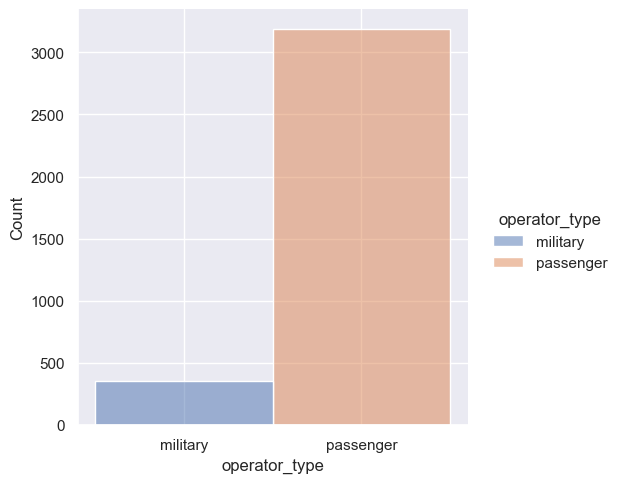

In [895]:
sns.displot(crash_data_final, x='operator_type', hue='operator_type')

### Question 4: Total number of fatalities

In [896]:
crash_data_final['Fatalities'].sum()

np.float64(83646.18002257336)

### Question 5: Total fatalities by Operator

In [897]:
crash_data_final['Operator']

0                  Military - U.S. Army
1                  Military - U.S. Navy
56                      Franco-Roumaine
80               Military - French Navy
83             KLM Royal Dutch Airlines
                     ...               
5263    Military - Indonesian Air Force
5264                        Service Air
5265                         Air France
5266                         Strait Air
5267        Military - Indian Air Force
Name: Operator, Length: 3544, dtype: object

In [898]:
crash_data_final.groupby('Operator')['Fatalities'].sum()

Operator
A B Aerotransport                 1.0
AB Aerotransport                 45.0
ACES Colombia                    27.0
ADC Airlines                     97.0
ADES Colombia                    22.0
                                 ... 
Zanex                             1.0
Zantop Air Transport             10.0
Zantop Airways                    2.0
Zantop International Airlines     4.0
Zen Nippon                        2.0
Name: Fatalities, Length: 1910, dtype: float64

In [899]:
grouped_fatalities = crash_data_final.groupby('operator_type')['Fatalities'].sum()
grouped_fatalities

operator_type
military      9905.590011
passenger    73740.590011
Name: Fatalities, dtype: float64

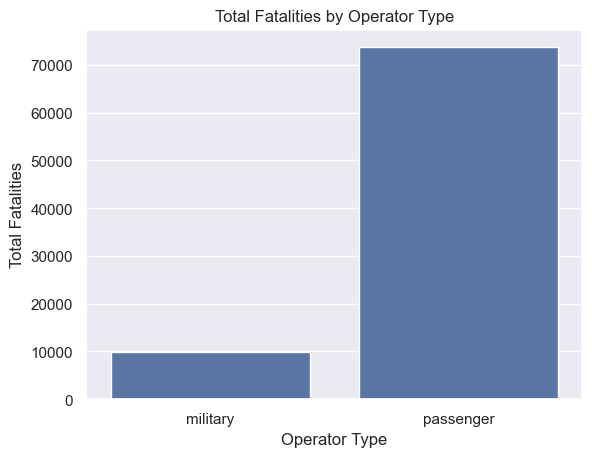

In [900]:
sns.barplot(x=grouped_fatalities.index, y=grouped_fatalities.values)
plt.title('Total Fatalities by Operator Type')
plt.xlabel('Operator Type')
plt.ylabel('Total Fatalities')
plt.show()

### Question 6: Relationship between number of fatalities and number of passengers Aboard.

In [901]:
crash_data_final[['Fatalities', 'Aboard']]

,Fatalities,Aboard
0,1.0,2.0
1,5.0,5.0
56,5.0,5.0
80,52.0,52.0
83,3.0,3.0
...,...,...
5263,98.0,112.0
5264,4.0,4.0
5265,228.0,228.0
5266,1.0,1.0


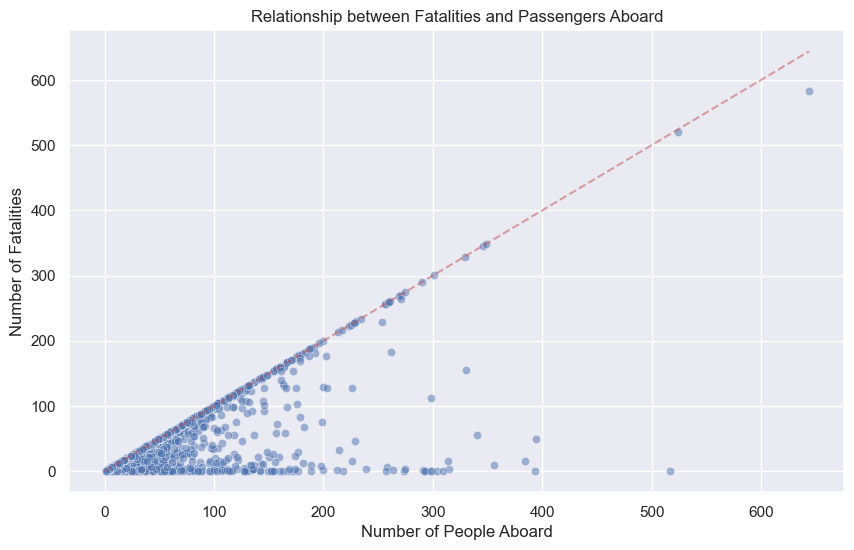

In [906]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=crash_data_final, x='Aboard', y='Fatalities', alpha=0.5)
plt.title('Relationship between Fatalities and Passengers Aboard')
plt.xlabel('Number of People Aboard')
plt.ylabel('Number of Fatalities')
plt.plot([0, crash_data_final['Aboard'].max()], [0, crash_data_final['Aboard'].max()], 'r--', alpha=0.5)
plt.show()

In [907]:
correlation = crash_data_final['Fatalities'].corr(crash_data_final['Aboard'])
print(f"Correlation coefficient between Fatalities and Aboard: {correlation:.3f}")

Correlation coefficient between Fatalities and Aboard: 0.744


### Summary

The correlation shows that there are usually more fatalities than people aboard, this mostly means that the extra fatalities stem from either people on the ground or other aircraft.

## Wordcloud

In [917]:
text = ' '.join(crash_data_final['Location'].dropna().astype(str))
text = text.lower()

In [918]:
placebos = ['near']

In [919]:
for placebo in placebos:
    text = text.replace(placebo, '')

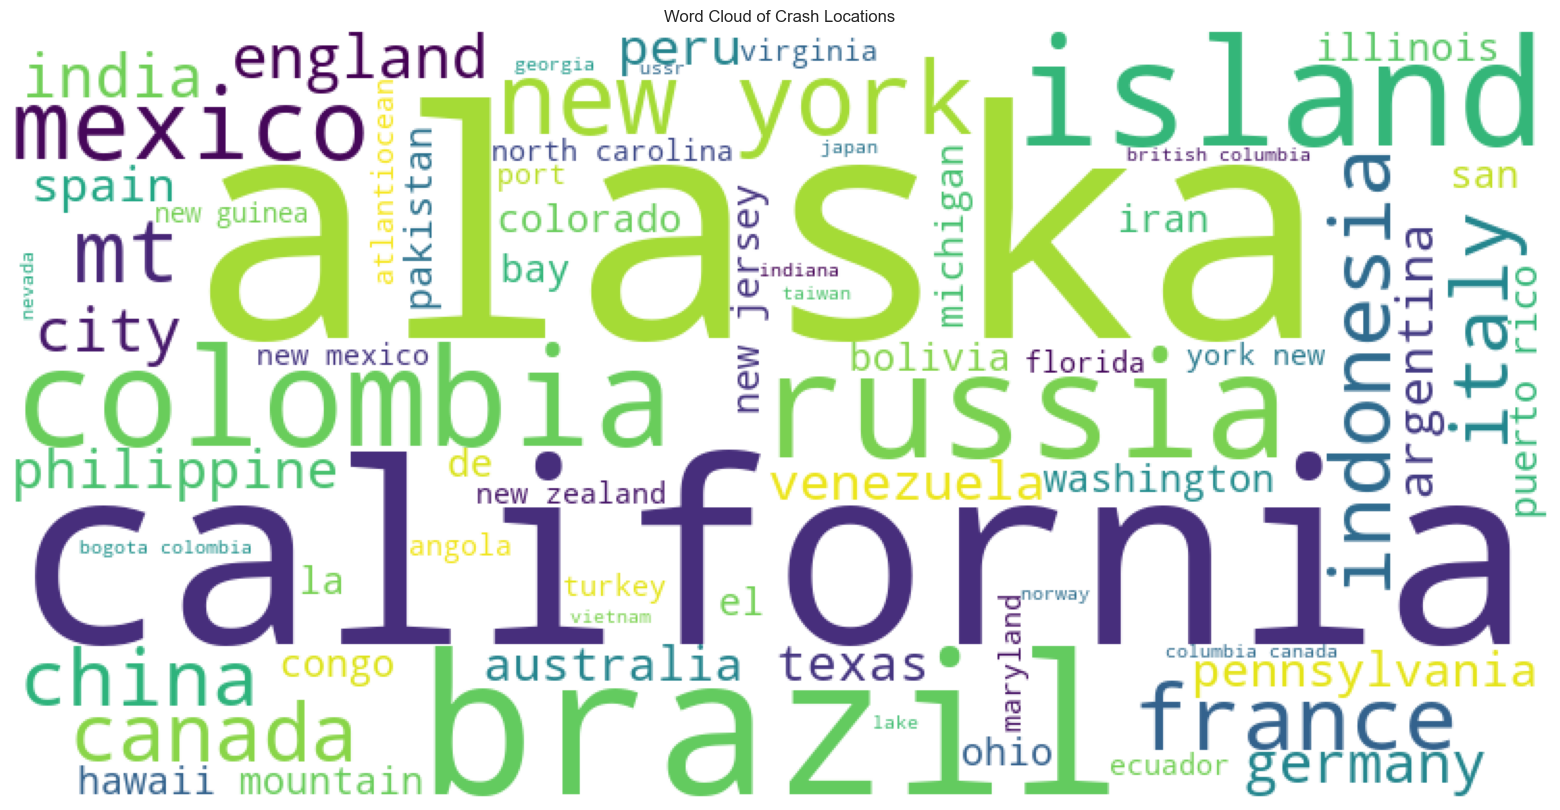

In [920]:
wordcloud = WordCloud(width=800, height=400, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Crash Locations')
plt.show()